###Headings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
dir = '/content/gdrive/MyDrive/Titanic'

###Data Creating

In [4]:
titanic = pd.read_csv(f"{dir}/train.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(titanic, test_size=0.1, random_state=42)

In [8]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


In [9]:
print(len(test_set))

90


###Data Modifying

In [10]:
data = train_set.copy()

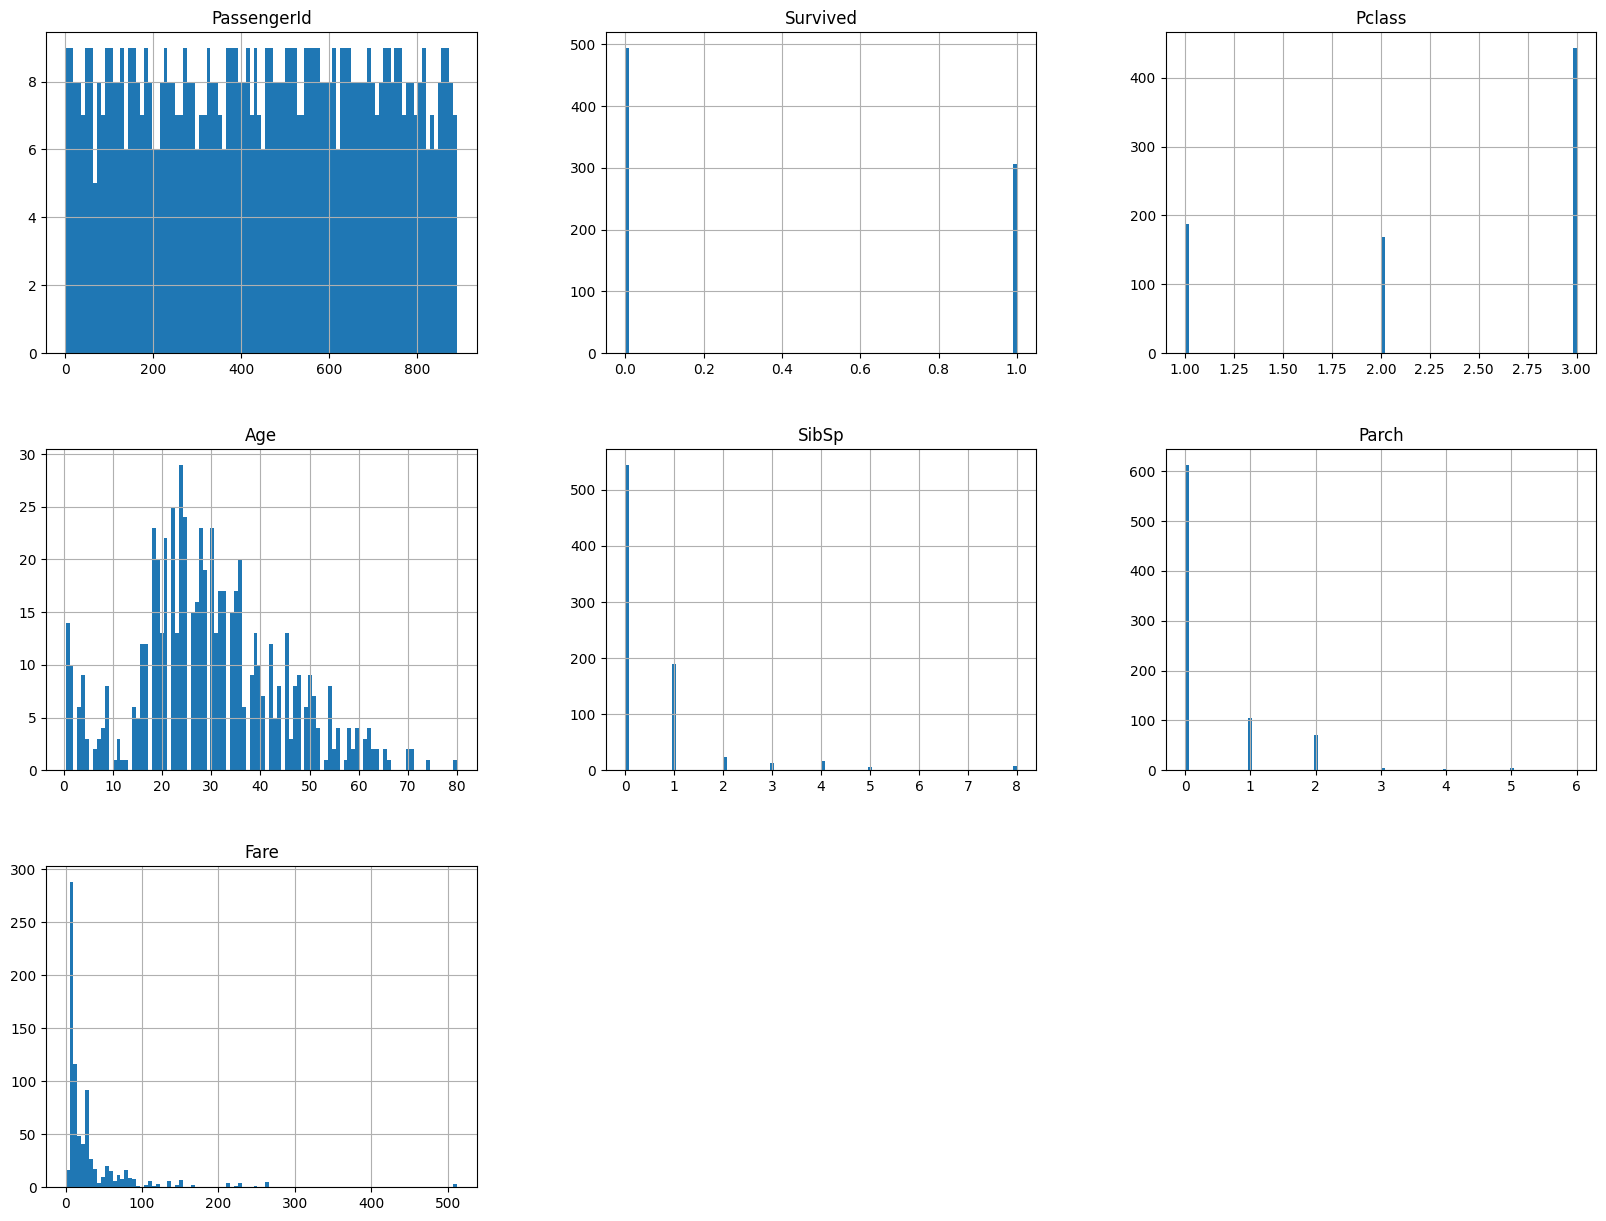

In [11]:
data.hist(bins=100, figsize=(20,15))
plt.show()

In [12]:
corr_matrix = data.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.002854 -0.032781  0.032966 -0.058216 -0.004397   
Survived       -0.002854  1.000000 -0.331102 -0.064454 -0.035817  0.079769   
Pclass         -0.032781 -0.331102  1.000000 -0.371600  0.079837  0.033283   
Age             0.032966 -0.064454 -0.371600  1.000000 -0.307462 -0.191395   
SibSp          -0.058216 -0.035817  0.079837 -0.307462  1.000000  0.419800   
Parch          -0.004397  0.079769  0.033283 -0.191395  0.419800  1.000000   
Fare            0.017384  0.248143 -0.546916  0.089959  0.154913  0.201181   

                 Fare  
PassengerId  0.017384  
Survived     0.248143  
Pclass      -0.546916  
Age          0.089959  
SibSp        0.154913  
Parch        0.201181  
Fare         1.000000  


<ipython-input-12-f50fb7f1b89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [13]:
def dropColumn(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    return df

In [14]:
data = dropColumn(data)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
165,1,3,male,9.0,0,2,20.5250,S
541,0,3,female,9.0,4,2,31.2750,S
625,0,1,male,61.0,0,0,32.3208,S
388,0,3,male,NaN,0,0,7.7292,Q
76,0,3,male,NaN,0,0,7.8958,S


In [16]:
data1 = data.reset_index()

In [17]:
c = 0
q = 0
s = 0
for i in range(len(data1)):
  if(data1.loc[i, 'Embarked'] == 'C'):
    c+=1
  if(data1.loc[i, 'Embarked'] == 'Q'):
    q+=1
  if(data1.loc[i, 'Embarked'] == 'S'):
    s+=1
print(c, q, s)

146 67 586


In [18]:
c = 0
q = 0
s = 0
for i in range(len(data1)):
  if(data1.loc[i, 'Embarked'] == 'C' and data1.loc[i, 'Survived'] == 1):
    c+=1
  if(data1.loc[i, 'Embarked'] == 'Q' and data1.loc[i, 'Survived'] == 1):
    q+=1
  if(data1.loc[i, 'Embarked'] == 'S' and data1.loc[i, 'Survived'] == 1):
    s+=1
print(c, q, s)
  

80 25 199


In [19]:
def completeData(df):
  avg_age = df["Age"].mean()
  df = df.reset_index()
  # df.fillna(avg_age+20)
  df['Age'] = df['Age'].replace(np.nan, avg_age+20)
  df = df.drop(['Embarked', 'index'], axis=1)
  for i in range(len(df)):
    if(df.loc[i, 'Sex'] == 'male'):
      df.loc[i, 'Sex'] = 1
    else:
      df.loc[i, 'Sex'] = 0
  return df


In [20]:
data = completeData(data)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,9.000000,0,2,20.5250
1,0,3,0,9.000000,4,2,31.2750
2,0,1,1,61.000000,0,0,32.3208
3,0,3,1,49.750657,0,0,7.7292
4,0,3,1,49.750657,0,0,7.8958


###Feature Label split and Other

In [22]:
mydata = data.copy()

In [23]:
def Splitting(data, label):
    data_x = data.drop(label, axis=1)
    data_y = pd.DataFrame(data[label])
    return data_x, data_y

In [24]:
data_x, data_y = Splitting(mydata, 'Survived')

In [25]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,9.000000,0,2,20.5250
1,3,0,9.000000,4,2,31.2750
2,1,1,61.000000,0,0,32.3208
3,3,1,49.750657,0,0,7.7292
4,3,1,49.750657,0,0,7.8958


In [26]:
data_y.head()

,Survived
0,1
1,0
2,0
3,0
4,0


In [27]:
s = 0
for i in range(len(data_y)):
  if(data_y.loc[i, 'Survived'] == 1):
    s+=1
print(s, len(data_y))

306 801


###Final Step (With test data)

In [28]:
def Pipe(df, label):
  df = dropColumn(df)
  df = completeData(df)
  x, y = Splitting(df, label)
  return x, y

In [29]:
test_x, test_y = Pipe(test_set, 'Survived')

In [30]:
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,49.26,1,1,15.2458
1,2,1,31.00,0,0,10.5000
2,3,1,20.00,0,0,7.9250
3,2,0,6.00,0,1,33.0000
4,3,0,14.00,1,0,11.2417


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc_x = StandardScaler()
data_x = sc_x.fit_transform(data_x)
test_x = sc_x.transform(test_x)

In [33]:
print(data_x)

[[ 0.82096936  0.72706668 -1.61904993 -0.47096355  2.01606834 -0.23081949]
 [ 0.82096936 -1.37538967 -1.61904993  3.07121298  2.01606834 -0.01684603]
 [-1.59222865  0.72706668  1.77633443 -0.47096355 -0.46643856  0.00397011]
 ...
 [ 0.82096936  0.72706668  0.47041737  1.30012472 -0.46643856 -0.35854075]
 [-1.59222865 -1.37538967 -1.29257066  0.41458059  2.01606834  1.74918147]
 [-1.59222865  0.72706668 -0.83549969 -0.47096355  0.77481489  0.89901016]]


In [34]:
data_y = data_y.to_numpy().reshape(len(data_y))
test_y = test_y.to_numpy().reshape(len(test_y))

In [35]:
test_y

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

###All

In [82]:
all_pred = [0 for _ in range(len(test_x))]

###Model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(data_x, data_y)

LogisticRegression(random_state=0)

In [85]:
y_pred = classifier.predict(test_x)
all_pred += y_pred

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
cm = confusion_matrix(test_y, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[46  8]
 [ 5 31]]


In [88]:
from sklearn.metrics import accuracy_score

In [89]:
print ("Accuracy : ", accuracy_score(test_y, y_pred))

Accuracy :  0.8555555555555555


###Iterative model

In [54]:
y_pred1 = [0 for _ in range(len(test_x))]
for i in range(100):
  classifier = LogisticRegression(random_state = i)
  classifier.fit(data_x, data_y)
  y_pred = classifier.predict(test_x)
  y_pred1 += y_pred
# y_pred1 = y_pred1//(100)

In [55]:
y_pred1

array([  0,   0,   0, 100, 100, 100, 100,   0, 100, 100,   0,   0,   0,
         0,   0, 100,   0, 100,   0,   0,   0,   0, 100,   0,   0,   0,
         0,   0,   0, 100,   0, 100,   0, 100,   0,   0, 100, 100, 100,
         0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0, 100, 100,
         0, 100,   0, 100,   0, 100, 100, 100,   0, 100, 100,   0,   0,
       100,   0,   0,   0, 100, 100, 100, 100, 100,   0,   0, 100, 100,
       100, 100,   0, 100, 100,   0,   0,   0, 100, 100,   0,   0])

In [53]:
print ("Accuracy : ", accuracy_score(test_y, y_pred1))

Accuracy :  0.8555555555555555


###Original Testing

In [ ]:
test_data_uk = pd.read_csv(f"{dir}/test.csv")

In [ ]:
def PipeforTest(df):
  df = dropColumn(df)
  df = completeData(df)
  return df

In [ ]:
test_data_uk_x = PipeforTest(test_data_uk)

In [ ]:
test_data_uk_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [ ]:
test_data_uk_x.isnull().values.any()

True

In [ ]:
test_data_uk_x['Fare'].isnull().sum()

1

In [ ]:
avg_fare = test_data_uk_x['Fare'].mean()
test_data_uk_x = test_data_uk_x.fillna(avg_fare)

In [ ]:
test_data_uk_x.isnull().values.any()

False

In [ ]:
final_test = sc_x.transform(test_data_uk_x)

In [ ]:
final_test

array([[ 0.82096936,  0.72706668,  0.04599433, -0.47096355, -0.46643856,
        -0.48352314],
       [ 0.82096936, -1.37538967,  0.86219249,  0.41458059, -0.46643856,
        -0.50002796],
       [-0.38562964,  0.72706668,  1.84163029, -0.47096355, -0.46643856,
        -0.4465346 ],
       ...,
       [ 0.82096936,  0.72706668,  0.30717774, -0.47096355, -0.46643856,
        -0.49505184],
       [ 0.82096936,  0.72706668,  1.07587907, -0.47096355, -0.46643856,
        -0.47912823],
       [ 0.82096936,  0.72706668,  1.07587907,  0.41458059,  0.77481489,
        -0.19432855]])

In [ ]:
final_pred = classifier.predict(final_test)

In [ ]:
final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

###Final Answer

In [ ]:
submission = pd.read_csv(f"{dir}/gender_submission.csv")

In [ ]:
len(final_pred)

418

In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred[i]

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv(f'{dir}/subm1.csv', index=False)

###Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model2 = DecisionTreeClassifier()
model2.fit(data_x, data_y)

DecisionTreeClassifier()

In [92]:
y_pred2 = model2.predict(test_x)
all_pred += y_pred2
print ("Accuracy : ", accuracy_score(test_y, y_pred2))

Accuracy :  0.7888888888888889


In [93]:
y_pred2

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [94]:
final_pred2 = model2.predict(final_test)

NameError: ignored

In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred2[i]
submission.to_csv(f'{dir}/subm2.csv', index=False)

###Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model3.fit(data_x, data_y)

RandomForestClassifier(max_depth=5, random_state=1)

In [97]:
y_pred3 = model3.predict(test_x)
all_pred += y_pred3
print ("Accuracy : ", accuracy_score(test_y, y_pred3))

Accuracy :  0.8111111111111111


In [ ]:
final_pred3 = model3.predict(final_test)

In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred3[i]
submission.to_csv(f'{dir}/subm3.csv', index=False)

###Iterative RF

In [64]:
import tqdm

In [75]:
y_pred1 = [0 for _ in range(len(test_x))]
for i in range(20):
  classifier = RandomForestClassifier(n_estimators=10*i+20, max_depth=5, random_state=i)
  classifier.fit(data_x, data_y)
  y_pred = classifier.predict(test_x)
  y_pred1 += y_pred
# y_pred1 = y_pred1//(100)

In [76]:
y_pred1

array([ 0,  0,  0, 20, 11, 20, 20,  0, 19, 20,  0,  0,  0,  0,  0, 20,  0,
       20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0, 19,  0, 20,
        0,  0,  0, 20, 20,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0, 19,
       20,  0, 20,  0, 20,  0, 20, 20, 16,  0, 20, 20,  0,  0, 20,  0,  0,
        0, 20, 20, 20,  0, 20,  0,  0, 20, 20, 20, 20,  0, 20, 20,  0,  0,
        0, 20, 20,  0,  0])

In [77]:
y_pred11 = []
for y in y_pred1:
  if(y > 10):
    y_pred11.append(1)
  else:
    y_pred11.append(0)
# print(y_pred11)

In [78]:
print ("Accuracy : ", accuracy_score(test_y, y_pred11))

Accuracy :  0.8222222222222222


In [79]:
y_pred11 = np.array(y_pred11)

In [80]:
y_pred11

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [81]:
test_y

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

###Deep Learning - MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [ ]:
model = Sequential([
    Flatten(input_shape=(6, )),
    Dense(4, activation='sigmoid'),  
    Dense(4, activation='sigmoid'), 
    Dense(1, activation='sigmoid'),  
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(data_x, data_y, epochs=40, 
          batch_size=24, 
          validation_split=0.2)

In [ ]:
y_pred4 = model.predict(test_x)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred4[:5]

array([[0.72122806, 0.308889  ],
       [0.6860751 , 0.338973  ],
       [0.71398556, 0.31517032],
       [0.25764114, 0.6929128 ],
       [0.39724252, 0.5703763 ]], dtype=float32)

In [ ]:
y_pred_4 = []
for p in y_pred4:
  y_pred_4.append(np.argmax(p))

In [ ]:
y_pred_4 = np.array(y_pred_4)

In [ ]:
y_pred_4

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
print ("Accuracy : ", accuracy_score(test_y, y_pred_4))

Accuracy :  0.8666666666666667


In [ ]:
final_pred4 = model.predict(final_test)

14/14 [==============================] - 0s 3ms/step


In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = np.argmax(final_pred4[i])
submission.to_csv(f'{dir}/subm4.csv', index=False)

###KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
clf = KNeighborsClassifier(n_neighbors = 2)

In [100]:
clf.fit(data_x, data_y)

KNeighborsClassifier(n_neighbors=2)

In [101]:
y_pred5 = clf.predict(test_x)
all_pred += y_pred5
print ("Accuracy : ", accuracy_score(test_y, y_pred5))

Accuracy :  0.8333333333333334


In [ ]:
final_pred5 = clf.predict(final_test)

In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred5[i]
submission.to_csv(f'{dir}/subm5.csv', index=False)

###Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(data_x, data_y)
preds6 = GNBclf.predict(test_x)

In [103]:
all_pred += preds6
print ("Accuracy : ", accuracy_score(test_y, preds6))

Accuracy :  0.8222222222222222


In [ ]:
final_pred6 = clf.predict(final_test)
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred6[i]
submission.to_csv(f'{dir}/subm6.csv', index=False)

###All Pred

In [104]:
all_pred = np.array(all_pred)

In [105]:
all_pred

array([1, 0, 0, 5, 3, 5, 4, 0, 4, 5, 1, 0, 0, 0, 0, 5, 1, 5, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 0, 3, 0, 5, 1, 4, 0, 1, 1, 4, 5, 0, 0, 0, 0, 0,
       4, 1, 0, 0, 0, 2, 5, 5, 0, 5, 0, 5, 0, 5, 5, 3, 1, 5, 5, 0, 0, 5,
       0, 1, 0, 5, 5, 5, 2, 5, 0, 0, 3, 5, 5, 4, 0, 5, 5, 0, 0, 0, 5, 5,
       0, 0])

In [106]:
test_y

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [110]:
all_pred_2 = []
for y in all_pred:
  if(y > 0):
    all_pred_2.append(1)
  else:
    all_pred_2.append(0)

In [111]:
all_pred_2 = np.array(all_pred_2)

In [112]:
all_pred_2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [113]:
print ("Accuracy : ", accuracy_score(test_y, all_pred_2))

Accuracy :  0.8
